In [1]:
import pandas as pd
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
X = [1,3,2,5,4]
quick_sort(X):
    if len(X) == 1:
        return X
    last = X[-1]
    rest = X[:-1]
    
    index_small = 0
    index_big = len(rest)
    
    while index_small < index_big:
        for i in range(len(rest)):
            if i<last:
                index_small = i
        reverse_indexs = [i for i in range(len(rest))][::-1]
        
        for i in reverse_indexs :
            if i>last:
                index_big = i
        X[index_small], X[index_large] = X[index_big], X[index_small]
        
        rest = X[index_small,index_big]
        
    left = X[:len(rest)/2]
    right = X [len(rest)/2:]
    
    left = quick_sort(left)
    right = quick_sort(right)
    return left+[last]+right

SyntaxError: invalid syntax (<ipython-input-7-101d05790f5d>, line 2)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data = train_data.dropna(axis=0, how='any',subset=['SalePrice'])
y = train_data.SalePrice
X = train_data.drop(['SalePrice'],axis=1).select_dtypes(exclude=['object'])

test_data = test_data.select_dtypes(exclude=['object'])

## Handling Missing Data

In [4]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [5]:
def missing_data_marker(df):
    cols_with_missing = (col for col in df.columns if df[col].isnull().any())
    for col in cols_with_missing:
        df[col+'_was_missing'] = df[col].isnull()
    return df

In [6]:
train_X = missing_data_marker(train_X)
test_X = missing_data_marker(test_X)

C:\Users\JialiangShi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
from sklearn.preprocessing import Imputer

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

## Model Tuning

#### n_estimators / early_stopping_rounds & learning_rate

#### n_jobs -  equal to the number of cores

In [8]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=3000, learning_rate=0.01, n_jobs=4)
early_stopping_rounds = 5
my_model.fit(train_X, train_y, early_stopping_rounds=early_stopping_rounds, 
             eval_set=[(test_X, test_y)], verbose=True)

[0]	validation_0-rmse:198584
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:196790
[2]	validation_0-rmse:194994
[3]	validation_0-rmse:193237
[4]	validation_0-rmse:191479
[5]	validation_0-rmse:189758
[6]	validation_0-rmse:188036
[7]	validation_0-rmse:186350
[8]	validation_0-rmse:184663
[9]	validation_0-rmse:182987
[10]	validation_0-rmse:181340
[11]	validation_0-rmse:179694
[12]	validation_0-rmse:178080
[13]	validation_0-rmse:176468
[14]	validation_0-rmse:174892
[15]	validation_0-rmse:173324
[16]	validation_0-rmse:171764
[17]	validation_0-rmse:170232
[18]	validation_0-rmse:168690
[19]	validation_0-rmse:167163
[20]	validation_0-rmse:165653
[21]	validation_0-rmse:164177
[22]	validation_0-rmse:162721
[23]	validation_0-rmse:161260
[24]	validation_0-rmse:159829
[25]	validation_0-rmse:158399
[26]	validation_0-rmse:156988
[27]	validation_0-rmse:155606
[28]	validation_0-rmse:154233
[29]	validation_0-rmse:152856
[30]	validation_0-rmse:151494
[31]	validation_

[262]	validation_0-rmse:37797.9
[263]	validation_0-rmse:37718.1
[264]	validation_0-rmse:37627.7
[265]	validation_0-rmse:37547.6
[266]	validation_0-rmse:37453.6
[267]	validation_0-rmse:37375.9
[268]	validation_0-rmse:37298.2
[269]	validation_0-rmse:37207.6
[270]	validation_0-rmse:37132.2
[271]	validation_0-rmse:37058.3
[272]	validation_0-rmse:36991.2
[273]	validation_0-rmse:36896
[274]	validation_0-rmse:36829
[275]	validation_0-rmse:36759.4
[276]	validation_0-rmse:36664.3
[277]	validation_0-rmse:36600.1
[278]	validation_0-rmse:36529.2
[279]	validation_0-rmse:36442.4
[280]	validation_0-rmse:36381
[281]	validation_0-rmse:36319
[282]	validation_0-rmse:36256.9
[283]	validation_0-rmse:36192
[284]	validation_0-rmse:36131.7
[285]	validation_0-rmse:36050.6
[286]	validation_0-rmse:35987.5
[287]	validation_0-rmse:35931.8
[288]	validation_0-rmse:35860.2
[289]	validation_0-rmse:35778.4
[290]	validation_0-rmse:35721.7
[291]	validation_0-rmse:35669.1
[292]	validation_0-rmse:35610.7
[293]	validation_0

[520]	validation_0-rmse:30504.9
[521]	validation_0-rmse:30501
[522]	validation_0-rmse:30496.8
[523]	validation_0-rmse:30495.4
[524]	validation_0-rmse:30484.8
[525]	validation_0-rmse:30481.5
[526]	validation_0-rmse:30474.9
[527]	validation_0-rmse:30478.4
[528]	validation_0-rmse:30470.3
[529]	validation_0-rmse:30467.3
[530]	validation_0-rmse:30467.7
[531]	validation_0-rmse:30459.5
[532]	validation_0-rmse:30456.7
[533]	validation_0-rmse:30455.6
[534]	validation_0-rmse:30448.5
[535]	validation_0-rmse:30447.2
[536]	validation_0-rmse:30439.4
[537]	validation_0-rmse:30429.3
[538]	validation_0-rmse:30428
[539]	validation_0-rmse:30427.2
[540]	validation_0-rmse:30431.5
[541]	validation_0-rmse:30427.3
[542]	validation_0-rmse:30424.8
[543]	validation_0-rmse:30415.1
[544]	validation_0-rmse:30412.3
[545]	validation_0-rmse:30410.3
[546]	validation_0-rmse:30402.7
[547]	validation_0-rmse:30403.3
[548]	validation_0-rmse:30400.8
[549]	validation_0-rmse:30396.9
[550]	validation_0-rmse:30388.5
[551]	valida

[778]	validation_0-rmse:29658
[779]	validation_0-rmse:29651.6
[780]	validation_0-rmse:29648.2
[781]	validation_0-rmse:29643.7
[782]	validation_0-rmse:29637.7
[783]	validation_0-rmse:29635.1
[784]	validation_0-rmse:29632
[785]	validation_0-rmse:29629.2
[786]	validation_0-rmse:29626.6
[787]	validation_0-rmse:29622.5
[788]	validation_0-rmse:29621.5
[789]	validation_0-rmse:29617
[790]	validation_0-rmse:29611.2
[791]	validation_0-rmse:29609.4
[792]	validation_0-rmse:29606.6
[793]	validation_0-rmse:29604.5
[794]	validation_0-rmse:29604.2
[795]	validation_0-rmse:29601.2
[796]	validation_0-rmse:29600
[797]	validation_0-rmse:29597.6
[798]	validation_0-rmse:29595
[799]	validation_0-rmse:29596.2
[800]	validation_0-rmse:29591.8
[801]	validation_0-rmse:29588.9
[802]	validation_0-rmse:29584.6
[803]	validation_0-rmse:29584.3
[804]	validation_0-rmse:29581.6
[805]	validation_0-rmse:29580.4
[806]	validation_0-rmse:29577.2
[807]	validation_0-rmse:29573.9
[808]	validation_0-rmse:29572.5
[809]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
rst = my_model.evals_result()
n_estimators = len(rst['validation_0']['rmse'])-early_stopping_rounds
n_estimators

920

In [10]:
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 17499.663227739726


### Retrain with all data

In [11]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [12]:
train_data = train_data.dropna(axis=0, how='any',subset=['SalePrice'])
y = train_data.SalePrice
X = train_data.drop(['SalePrice'],axis=1).select_dtypes(exclude=['object'])

test_data = test_data.select_dtypes(exclude=['object'])

In [13]:
#X = missing_data_marker(X)
#test_data = missing_data_marker(test_data)

X = my_imputer.fit_transform(X)
test_data = my_imputer.transform(test_data)

In [14]:
my_model = XGBRegressor(n_estimators=n_estimators, learning_rate=0.01,n_jobs=4)
my_model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=920,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
predictions = my_model.predict(test_data)

### Partial Dependence Plot

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
my_model = GradientBoostingRegressor()
my_model.fit(train_X,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
predictions = my_model.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 17481.654895649917


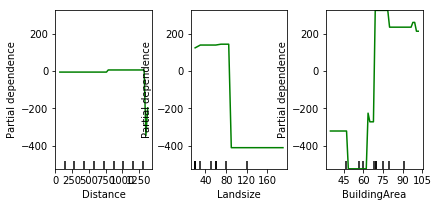

In [18]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

my_plots = plot_partial_dependence(my_model,       
                                   features=[0,1,2], # column numbers of plots we want to show
                                   X=train_X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=50) # number of values to plot on x axis